In [0]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files

In [16]:

uploaded = files.upload()

Saving project2.zip to project2.zip


In [19]:

!unzip project2.zip >/dev/null

replace deblur.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [18]:
ls

 classnotes.sty   hw2.pdf   __MACOSX/      sample_data/     swift.mat
 deblur.mat       hw2.tex   project2.zip  'swift (1).mat'


In [23]:

mat_contents = sio.loadmat('swift.mat')

sorted(mat_contents.keys())

['A', 'An', '__globals__', '__header__', '__version__']

In [0]:
A=mat_contents['A']
An=mat_contents['An']

(-0.5, 1023.5, 511.5, -0.5)

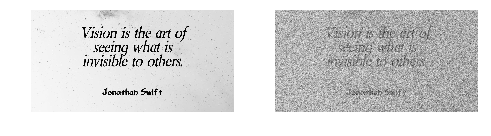

In [154]:
fig, (ax1,ax2) = plt.subplots(1,2)
im1 = ax1.imshow(A)
im2 = ax2.imshow(An)

ax1.axis('off')
ax2.axis('off')

In [102]:
A_U, A_S, A_V = np.linalg.svd(A, full_matrices=False)
An_U, An_S, An_V = np.linalg.svd(An, full_matrices=False)

[-599.89536456  -98.8725893   495.78456135 ...  844.30785389 -232.46561639
  164.89390273]


Text(0, 0.5, 'singular values')

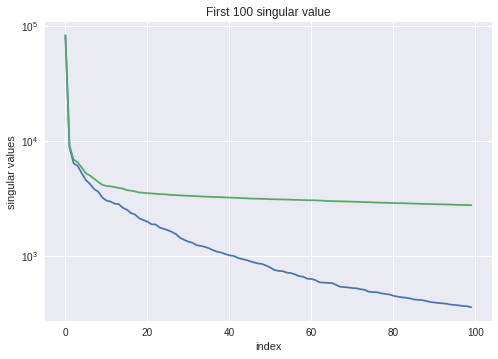

In [176]:
fig2, ax2 = plt.subplots()
plt.semilogy(np.arange(0,100),A_S[np.arange(0,100)])
plt.semilogy(np.arange(0,100),An_S[np.arange(0,100)])
ax2.set_title('First 100 singular value')
ax2.set_xlabel('index')
ax2.set_ylabel('singular values')

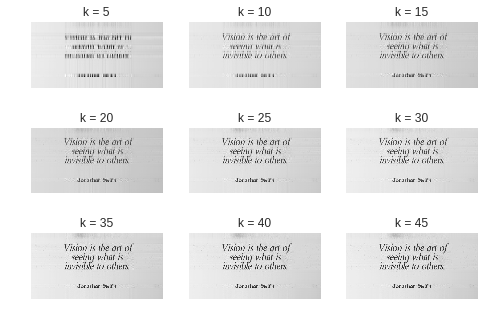

In [163]:
ks = [5*x for x in range(1,10)]
error = np.zeros(9)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3)
axes = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)
    
for i in range(9):
  k = ks[i]
  ax = axes[i]
  Ek = np.diag(A_S[:k])
  A_k = np.dot(A_U[:,:k],np.dot(Ek, A_V[:k,:]))
  error[i] = np.linalg.norm(A - A_k, 'fro') / np.linalg.norm(A,'fro')

  
  ax.axis('off')
  ax.imshow(A_k)
  ax.set_title('k = %d' % k)
  

Text(0, 0.5, 'Relative error')

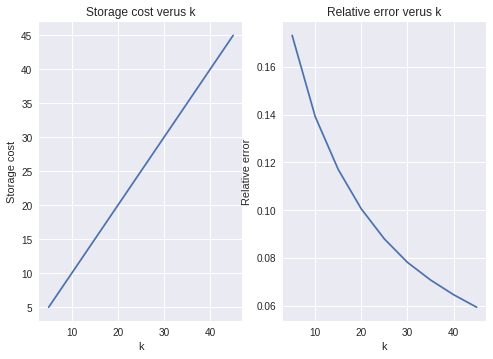

In [164]:
fig, (ax1,ax2) = plt.subplots(1,2)
cost = []

for i in range (9):
  cost.append((ks[i] * (A_k.shape[0] * A_k.shape[1] + 1)/(A_k.shape[0]*A_k.shape[1])))

ax1.plot(ks, cost)
ax2.plot(ks, error)

ax1.set_title('Storage cost verus k')
ax1.set_xlabel('k')
ax1.set_ylabel('Storage cost')

ax2.set_title('Relative error verus k')
ax2.set_xlabel('k')
ax2.set_ylabel('Relative error')

[0.49911706 0.48712412 0.47845263 0.47104271 0.46417297 0.45757763
 0.45116274 0.44488482 0.43872273]


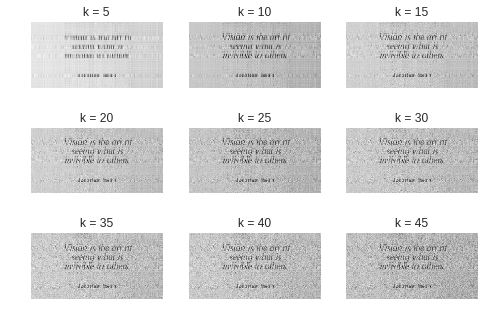

In [174]:
ks = [5*x for x in range(1,10)]
error = np.zeros(9)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3)
axes = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)
    
for i in range(9):
  k = ks[i]
  ax = axes[i]
  Ek = np.diag(An_S[:k])
  An_k = np.dot(An_U[:,:k],np.dot(Ek, An_V[:k,:]))
  error[i] = np.linalg.norm(An - An_k, 'fro') / np.linalg.norm(An,'fro')

  
  ax.axis('off')
  ax.imshow(An_k)
  ax.set_title('k = %d' % k)


Text(0.5, 0, 'k')

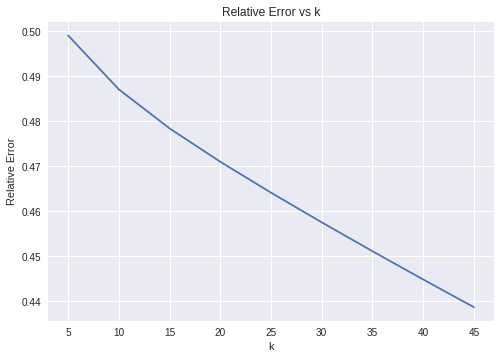

In [173]:
fig, ax1 = plt.subplots()

ax1.plot(ks, error)

ax1.set_title('Relative Error vs k')
ax1.set_ylabel('Relative Error')
ax1.set_xlabel('k')